# PERSONAS QUE GANAN MÁS DE 50K.

Interrogantes generales a responder:
- Quiénes son?
- Qué perfil tienen?
- Si el departamento de lavado de activos quiere predecir qué personas ganan más de 50k, qué modelo le recomendaría?

DataSet: https://archive.ics.uci.edu/ml/datasets/adult

Hola equipo de data scientist! Somos el equipo de lavado de activos de la Corpotación financiera Nacional. Necesitamos su ayuda para respondera las siguientes interrogantes:

1.

Usa el siguite código como ayuda

In [25]:
# importa las librerias necesarias
import pandas as pd
import numpy as np
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm, trange


from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
# lee la base de datos: hit: El separador es ", " y NO TIENE CABECERA
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

In [3]:
#muestra los primeros 5 casos
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# declara el nombre de las columnas, este codigo puede ser de ayuda.
columnas=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
df.columns = columnas

In [5]:
# declara tu variable dependiente>
# Tomara los valores de 0 si es <=50k, 1 caso contrario

df['salario'] = np.where(df['target']==' <=50K',0,1)

In [6]:
# tu data es balanceada? si no lo es qué recomendaciones tienes? hit: investiga sobre bases de datos no balanceadas
df.salario.value_counts()
# la data no está balanceada

0    24720
1     7841
Name: salario, dtype: int64

In [7]:
# Resuelve el problema de desbalanceo, elige y justifica tu respuesta de la decisión.
# stratify

In [8]:
# Crea una variable que indique si trabajaste menos de 40 horas
df['40_horas'] = np.where(df['hours-per-week']<40, 1, 0)

In [9]:
# calcula la utilidad del capita: capital ganado-capital perdido
df['utilidad'] = df['capital-gain'] - df['capital-loss']


In [10]:
# si es mujer, coloca el valor de 1
df['mujer'] = np.where(df['sex']==' Female',1,0)

In [11]:
# si nació en USA será 1, 0 caso contrario
df['usa'] = np.where(df['native-country']==' United-States',1,0)

In [12]:
# puedes crear más variables?
df['white'] = np.where(df['race']==' White',1,0)
df['relationship'] = np.where(df['relationship'].isin([' Husband',' Wife']),' Married', df.relationship)

df.relationship.value_counts()


 Married           14761
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Other-relative      981
Name: relationship, dtype: int64

## MODEL

In [13]:

pd.get_dummies(df)
# ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)X_ohe = ohe.fit_transform(X)X=X_ohe



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salario,40_horas,utilidad,mujer,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,target_ <=50K,target_ >50K
0,39,77516,13,2174,0,40,0,0,2174,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target', 'salario', '40_horas', 'utilidad', 'mujer', 'usa', 'white'],
      dtype='object')

In [15]:
# Declara X y Y
X = pd.get_dummies(df[['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
                   'occupation', '40_horas', 'utilidad', 'mujer', 'usa', 'white']])

y = df['salario']


In [16]:
# en una sola vista, muesta las dimensiones de X, Y y del total dela base
print(X.shape, y.shape)

(32561, 54) (32561,)


In [21]:
# divide entre entrenamiento y testeo
rs = 2022
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=rs)


In [22]:
# ejecuta los modelos indicados
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier

logit = make_pipeline(StandardScaler(), LogisticRegression()).fit(X_train, y_train)
knn   = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=45, n_jobs=-1)).fit(X_train, y_train)
dtree = DecisionTreeClassifier(random_state=rs).fit(X_train, y_train)
rf    = RandomForestClassifier(random_state=rs, n_jobs=-1).fit(X_train, y_train)
pca_rf= make_pipeline(StandardScaler(), PCA(n_components=5),  RandomForestClassifier(random_state=rs, n_jobs=-1)).fit(X_train, y_train)

# CLUSTER + RF
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
dbs = DBSCAN().fit(X1)
X_cluster = X.copy()
X_cluster['cluster'] = dbs.labels_
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_cluster, y, stratify=y, test_size=0.2, random_state=rs)
clu_rf = RandomForestClassifier(random_state=rs, n_jobs=-1).fit(X_train2, y_train2)

# XGBOOST
xgboost = GradientBoostingClassifier(random_state=rs).fit(X_train, y_train)


In [23]:

print(logit.score(X_test, y_test),
knn.score(X_test, y_test),
dtree.score(X_test, y_test),
rf.score(X_test, y_test),
pca_rf.score(X_test, y_test),
clu_rf.score(X_test2, y_test2),
xgboost.score(X_test, y_test), sep='\n')

0.8435436818670352
0.8326424074927069
0.8105327805926609
0.849531705819131
0.8205128205128205
0.8475356978350991
0.8633502226316597


  0%|          | 0/10 [00:00<?, ?it/s]

   nest     score
9   901  0.869338


<AxesSubplot:>

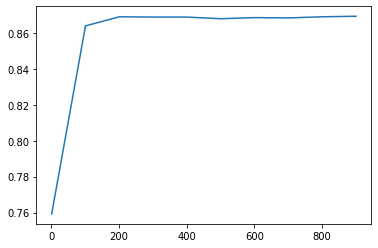

In [30]:
est_range = range(1, 1000, 100)
scores = []
for est in tqdm(est_range):
    rf = GradientBoostingClassifier(random_state=rs, n_estimators=est).fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

print(pd.DataFrame({'nest':est_range, 'score':scores}).sort_values('score', ascending=False).head(1))
sns.lineplot(x=est_range, y=scores)



In [42]:
from sklearn.model_selection import GridSearchCV


# gs = GridSearchCV(estimator=xgboost, param_grid={'n_estimators':range(1, 300, 10)}, n_jobs=-1)
gs = GridSearchCV(estimator=xgboost, param_grid={'n_estimators':range(1, 1000, 100)}, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=2022), n_jobs=-1,
             param_grid={'n_estimators': range(1, 1000, 100)})

In [43]:
gs.best_params_

{'n_estimators': 401}

In [44]:
gs.best_score_

0.8725432101312911

In [31]:
pd.DataFrame({'nest':est_range, 'score':scores}).sort_values('score', ascending=False)

,nest,score
9,901,0.869338
2,201,0.869031
8,801,0.869031
3,301,0.868878
4,401,0.868878
6,601,0.868571
7,701,0.868417
5,501,0.867956
1,101,0.863964
0,1,0.759251


In [92]:
est_range = range(5, 100, 5)
scores = []
for est in est_range:
    rf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=est, n_jobs=-1)).fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

print(pd.DataFrame({'nest':est_range, 'score':scores}).sort_values('score', ascending=False).head(1))
sns.lineplot(x=est_range, y=scores)


KeyboardInterrupt: 

<AxesSubplot:>

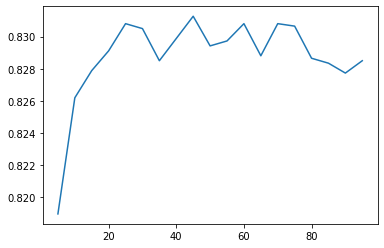

,nest,score
8,45,0.831261


In [ ]:
# cual es el mejor modelo?